#  2.1 AutoML con Pycaret
### Clasificacion del uso de la tarjeta de crédito

In [ ]:
!pip install pycaret

# Obtención de los datos

In [1]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [2]:
#check the shape of data
dataset.shape

(24000, 24)

In [3]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# Preprocesamiento de los datos

In [4]:
from pycaret.classification import *

In [5]:
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


# Comparación de modelos

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.6592,0.8098,0.8037,0.3837,0.4124,0.0370
lda,Linear Discriminant Analysis,0.8247,0.7634,0.6630,0.8086,0.8046,0.3884,0.4132,0.1270
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.6543,0.8058,0.8002,0.3725,0.4010,1.3260
ada,Ada Boost Classifier,0.8221,0.7697,0.6523,0.8053,0.7992,0.3690,0.3983,0.3120
catboost,CatBoost Classifier,0.8215,0.7760,0.6574,0.8043,0.8007,0.3759,0.4007,4.5660
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.6553,0.8036,0.7997,0.3721,0.3977,0.0980
rf,Random Forest Classifier,0.8199,0.7598,0.6566,0.8024,0.7995,0.3727,0.3965,0.6570
xgboost,Extreme Gradient Boosting,0.8160,0.7561,0.6528,0.7969,0.7958,0.3617,0.3829,1.2410
et,Extra Trees Classifier,0.8092,0.7377,0.6502,0.7890,0.7909,0.3497,0.3657,0.5600
lr,Logistic Regression,0.7814,0.6410,0.5001,0.6324,0.6856,0.0003,0.0034,0.3570


In [6]:
print(best_model)

NameError: name 'best_model' is not defined

# Ver modelos disponibles para entrenar en PyCaret

In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Decision Tree Classifier

In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7343,0.6257,0.6257,0.7420,0.7380,0.2444,0.2447
1,0.7325,0.6277,0.6266,0.7421,0.7369,0.2443,0.2448
2,0.7431,0.6282,0.6282,0.7452,0.7441,0.2544,0.2544
3,0.7274,0.6151,0.6151,0.7350,0.7310,0.2240,0.2242
4,0.7187,0.6054,0.6054,0.7282,0.7231,0.2038,0.2042
5,0.7187,0.6014,0.6002,0.7253,0.7218,0.1958,0.1960
6,0.7206,0.6128,0.6128,0.7326,0.7261,0.2162,0.2168
7,0.7331,0.5986,0.5991,0.7276,0.7302,0.2024,0.2026
8,0.7206,0.6045,0.6045,0.7280,0.7241,0.2036,0.2038
9,0.7442,0.6272,0.6272,0.7453,0.7447,0.2533,0.2533


In [9]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### Neighbors Classifier

In [14]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7469,0.6020,0.5471,0.7022,0.7169,0.1128,0.1204
1,0.7550,0.5894,0.5585,0.7131,0.7257,0.1402,0.1500
2,0.7506,0.5883,0.5371,0.6971,0.7128,0.0923,0.1024
3,0.7419,0.5818,0.5294,0.6878,0.7057,0.0723,0.0790
4,0.7563,0.5908,0.5376,0.7005,0.7148,0.0954,0.1085
5,0.7550,0.5997,0.5461,0.7055,0.7193,0.1139,0.1255
6,0.7638,0.5890,0.5569,0.7175,0.7282,0.1413,0.1565
7,0.7613,0.6240,0.5460,0.7094,0.7213,0.1163,0.1318
8,0.7619,0.5988,0.5546,0.7150,0.7264,0.1356,0.1500
9,0.7549,0.5756,0.5511,0.7088,0.7223,0.1246,0.1351


### Random Forest Classifier

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.7673,0.6504,0.7935,0.7934,0.3551,0.3749
1,0.8239,0.7615,0.6635,0.8075,0.8043,0.3882,0.4117
2,0.8258,0.7708,0.6533,0.8110,0.8018,0.3756,0.4098
3,0.8177,0.7605,0.6574,0.7993,0.7984,0.3710,0.3913
4,0.8208,0.7642,0.6594,0.8033,0.8010,0.3780,0.4006
5,0.8283,0.7638,0.6724,0.8133,0.8100,0.4070,0.4297
6,0.8127,0.7647,0.6490,0.7926,0.7925,0.3522,0.3721
7,0.8283,0.7390,0.6580,0.8145,0.8050,0.3861,0.4202
8,0.8108,0.7496,0.6488,0.7905,0.7913,0.3496,0.3678
9,0.8176,0.7565,0.6534,0.7988,0.7971,0.3645,0.3867


# Optimización del modelo

### 9.1 Decision Tree Classifier

In [10]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.7475,0.6347,0.7999,0.7898,0.3355,0.3728
1,0.8289,0.7711,0.6522,0.8169,0.8032,0.3782,0.4190
2,0.8208,0.7377,0.6295,0.8072,0.7892,0.3305,0.3796
3,0.8252,0.7580,0.6416,0.8125,0.7968,0.3563,0.4010
4,0.8195,0.7545,0.6359,0.8030,0.7913,0.3398,0.3794
5,0.8271,0.7509,0.6531,0.8132,0.8025,0.3769,0.4134
6,0.8195,0.7488,0.6369,0.8028,0.7918,0.3415,0.3801
7,0.8246,0.7529,0.6350,0.8136,0.7936,0.3446,0.3957
8,0.8195,0.7241,0.6369,0.8028,0.7918,0.3415,0.3801
9,0.8188,0.7378,0.6345,0.8016,0.7906,0.3362,0.3751


In [11]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### 9.2 K Neighbors Classifier

In [15]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7813,0.6482,0.5134,0.7234,0.6997,0.0402,0.0876
1,0.7807,0.6436,0.5109,0.7180,0.6973,0.0330,0.0759
2,0.7744,0.6563,0.5069,0.6853,0.6938,0.0206,0.0403
3,0.7845,0.6589,0.5257,0.7402,0.7112,0.0754,0.1345
4,0.7826,0.6645,0.5122,0.7340,0.6983,0.0368,0.0903
5,0.7794,0.6477,0.5184,0.7169,0.7045,0.0539,0.0961
6,0.7826,0.6278,0.5235,0.7315,0.7091,0.0688,0.1214
7,0.7751,0.6702,0.5094,0.6920,0.6962,0.0278,0.0523
8,0.7813,0.6409,0.5227,0.7260,0.7084,0.0662,0.1146
9,0.7881,0.6426,0.5278,0.7582,0.7138,0.0822,0.1548


In [16]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


### Random Forest Classifier

In [18]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8158,0.7508,0.6366,0.7965,0.7896,0.3363,0.3689
1,0.8283,0.7675,0.6487,0.8167,0.8015,0.3719,0.4152
2,0.8139,0.7337,0.6354,0.7937,0.7880,0.3321,0.3628
3,0.8246,0.7588,0.6391,0.8120,0.7954,0.3514,0.3976
4,0.8170,0.7567,0.6467,0.7981,0.7942,0.3539,0.3805
5,0.8258,0.7506,0.6481,0.8120,0.7998,0.3676,0.4067
6,0.8170,0.7530,0.6425,0.7982,0.7926,0.3474,0.3771
7,0.8221,0.7507,0.6478,0.8056,0.7975,0.3621,0.3951
8,0.8177,0.7201,0.6306,0.8006,0.7880,0.3286,0.3699
9,0.8207,0.7484,0.6378,0.8044,0.7929,0.3439,0.3831


# Visualización de los resultados del modelo

In [12]:
my_model = tuned_dt

###  AUC Plot

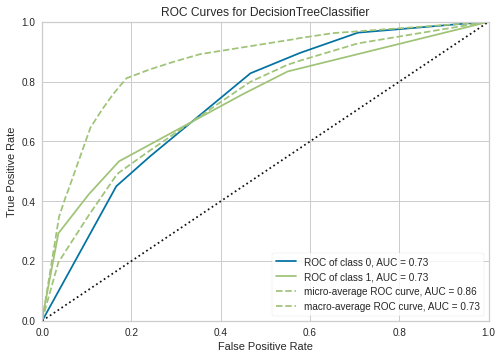

In [13]:
plot_model(my_model, plot='auc')

### Precision-Recall Curve

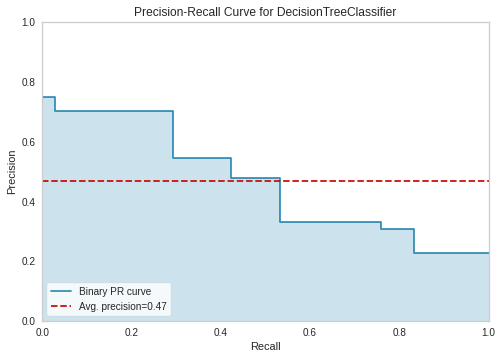

In [14]:
plot_model(my_model, plot = 'pr')

### Distribución de factores importantes

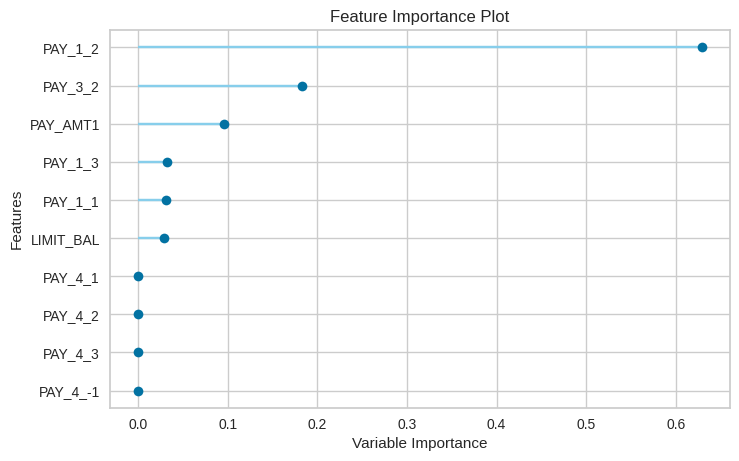

In [15]:
plot_model(my_model, plot='feature')

### Matriz de confusión

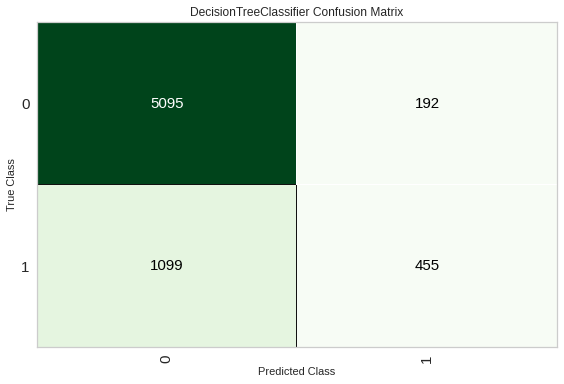

In [16]:
plot_model(my_model, plot = 'confusion_matrix')

In [17]:
evaluate_model(my_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predicción

In [32]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.8126,0.7538,0.3212,0.6559,0.4312,0.3345


# Finalización del modelo

In [33]:
final_rf = finalize_model(tuned_rf)

In [34]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [35]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.8361,0.8189,0.3681,0.7715,0.4984,0.4148


# Predicción con datos de test

In [36]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.1917
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.0531
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.1970
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7300
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.2164


# Guardar el modelo

In [39]:
save_model(final_rf,'Final RF Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [40]:
saved_final_rf = load_model('Final RF Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded


In [41]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [42]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.1917
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.0531
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.1970
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7300
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.2164
